In [5]:
##CZĘŚĆ I. Uczenie nadzorowane
#1. Przygotować zbiór treningowy dla algorytmów identyfikacji klas stron internetowych, np. portal z wiadomościami itp.

from pymongo import MongoClient
import pandas as pd
klient=MongoClient("mongodb://127.0.0.1:27017")
db=klient['N5205_2024']
df=pd.DataFrame(list(db.lab1.find({})))

print(df.shape[0])
df=df.drop_duplicates(subset='url')
print(df.shape[0])
df.head()

#2. Dodać kolumnę o nazwie dlugosc do DataFrame, określającą długość strony internetowej w znakach.


107
43


,_id,url,contents,date,length
0,66484e7446191e92241a631e,http://ug.edu.pl,"<!DOCTYPE html>\n<html lang=""pl"" dir=""ltr"" pre...",2024-05-18 06:45:08.399,74360
2,66484e7af341e05ea2c76137,http://wp.pl,"<!DOCTYPE html> <html lang=""pl""><head><meta ch...",2024-05-18 06:45:14.293,671536
8,66484ea1d2e89c83e9c850ae,https://b-ossier.com/,"<!DOCTYPE html>\n<html lang=""pl-PL"">\n\n<head>...",2024-05-18 06:45:53.942,576769
13,66484ed81fb1df3e6e3432a8,http://pg.edu.pl,"<!DOCTYPE html>\n<html lang=""pl"" dir=""ltr"" pre...",2024-05-18 06:46:48.693,141678
14,66484efdf341e05ea2c7613b,http://allegro.pl,<html><head><title>allegro.pl</title><style>#c...,2024-05-18 06:47:25.885,580


In [8]:
df['length']=df['contents'].str.len()
df.head(10)

def f(row):
    number=0
    social_media=['facebook','x.com','instagram','twitter','youtube','tiktok','pinterest','reddit','linkedin','artstation','deviantart']
    for s in social_media:
        try:
            if s in row['contents'].lower():
                number+=1
        except:
            continue
    return number
   
f({'contents':'tutaj sa dwa linki do youtube.com oraz linkedin'})
df['media']=df.apply(f,axis=1)
df.head()

,_id,url,contents,date,length,media
0,66484e7446191e92241a631e,http://ug.edu.pl,"<!DOCTYPE html>\n<html lang=""pl"" dir=""ltr"" pre...",2024-05-18 06:45:08.399,74360,5
2,66484e7af341e05ea2c76137,http://wp.pl,"<!DOCTYPE html> <html lang=""pl""><head><meta ch...",2024-05-18 06:45:14.293,671536,5
8,66484ea1d2e89c83e9c850ae,https://b-ossier.com/,"<!DOCTYPE html>\n<html lang=""pl-PL"">\n\n<head>...",2024-05-18 06:45:53.942,576769,5
13,66484ed81fb1df3e6e3432a8,http://pg.edu.pl,"<!DOCTYPE html>\n<html lang=""pl"" dir=""ltr"" pre...",2024-05-18 06:46:48.693,141678,4
14,66484efdf341e05ea2c7613b,http://allegro.pl,<html><head><title>allegro.pl</title><style>#c...,2024-05-18 06:47:25.885,580,0


In [9]:
df_websites=df.groupby('url').agg({'length':sum, 'media':sum, 'date':lambda x:x.nunique()})

df_websites.columns=['length','media','date']

df_websites.head(1)

df_websites['average_length']=df_websites['length']/df_websites['date']

df_rank=df_websites.rank(method='first')

df_normalized=(df_rank-df_rank.mean())/df_rank.std()

df_normalized.head()

,length,media,date,average_length
url,,,,
http://allegro.pl,-1.274236,-1.672435,-1.672435,-1.274236
http://antyradio.pl,0.318559,-0.398199,-1.592796,0.318559
http://cropp.com,-1.592796,-1.592796,-1.513156,-1.592796
http://dziennikbaltycki.pl,-1.194597,-1.513156,-1.433516,-1.194597
http://gdansk.naszemiasto.pl,1.513156,-0.637118,-1.353876,1.513156


In [12]:
# ETAP 4

from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score

from sklearn import metrics 

from scipy.spatial.distance import cdist

for n_cluster in [2, 3, 4, 5, 6, 7, 8, 9, 10]:

    kmeans = KMeans(n_clusters=n_cluster,max_iter=400,n_init=20).fit(df_normalized[['length',

                                                  'date',

                                                  'average_length']])

    silhouette_avg = silhouette_score(df_normalized[['length',

                                                     'date',

                                                     'average_length']],

                                      kmeans.labels_) 

    print('Silhouette coefficient for %i clusters: %0.3f' % (n_cluster, silhouette_avg))

Silhouette coefficient for 2 clusters: 0.424
Silhouette coefficient for 3 clusters: 0.435
Silhouette coefficient for 4 clusters: 0.473
Silhouette coefficient for 5 clusters: 0.426
Silhouette coefficient for 6 clusters: 0.457
Silhouette coefficient for 7 clusters: 0.464
Silhouette coefficient for 8 clusters: 0.463
Silhouette coefficient for 9 clusters: 0.455
Silhouette coefficient for 10 clusters: 0.446


/tmp/ipykernel_636758/2243606592.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, distortions, 'bx-',  linewidth=2.5, color='blue')


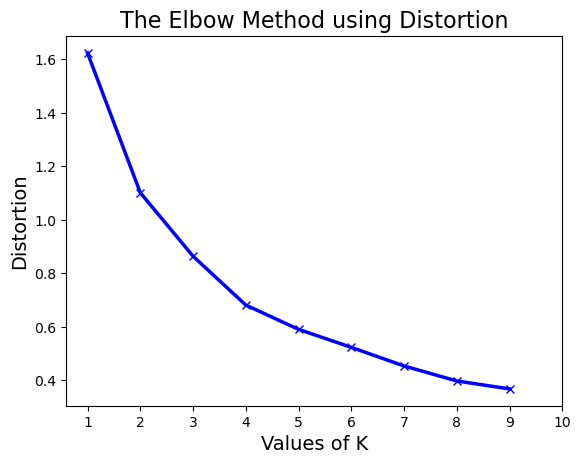

/tmp/ipykernel_636758/2243606592.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, inertias, 'bx-', linewidth=2.5, color='blue')


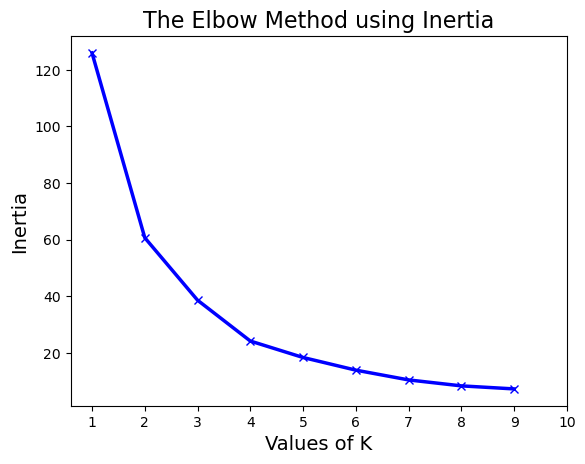

In [14]:
# ETAP 5
import numpy as np
import matplotlib.pyplot as plt
distortions = [] 

inertias = []

K=range(1, 10)

for k in K: 

    kmeanModel = KMeans(n_clusters=k,

                        max_iter=400,

                        n_init=20).fit(df_normalized[['length',

                                                      'date',

                                                      'average_length']]) 

    kmeanModel.fit(df_normalized[['length', 'date', 'average_length']])

    distortions.append(sum(np.min(cdist(df_normalized[['length',

                                                      'date',

                                                      'average_length']],

                                        kmeanModel.cluster_centers_,

                                        'euclidean'),axis=1)) / df_normalized[['length',

                                                      'date',

                                                      'average_length']].shape[0]) 

    inertias.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-',  linewidth=2.5, color='blue') 

plt.xlabel('Values of K', fontsize=14) 

plt.ylabel('Distortion', fontsize=14) 

plt.title('The Elbow Method using Distortion', fontsize=16) 

plt.xticks(np.arange(1, 11))

plt.show()

plt.plot(K, inertias, 'bx-', linewidth=2.5, color='blue') 

plt.xlabel('Values of K', fontsize=14) 

plt.ylabel('Inertia', fontsize=14) 

plt.title('The Elbow Method using Inertia', fontsize=16) 

plt.xticks(np.arange(1, 11))

plt.show()

Text(0, 0.5, 'length')

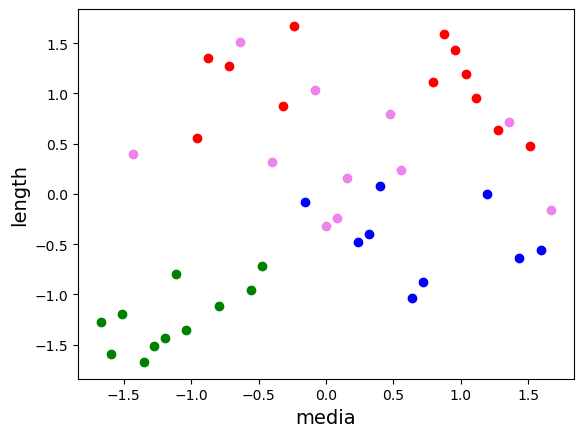

In [19]:
# ETAP 6

kmeans=KMeans(n_clusters=4,max_iter=400,n_init=20).fit(

    df_normalized[['length','date','average_length','media']])

df_clusters=df_normalized[['length','date','average_length','media']].copy(

    deep=True)

df_clusters['cluster']=kmeans.labels_

df_clusters

plt.scatter(df_clusters.loc[df_clusters['cluster']==0]['media'],

            df_clusters.loc[df_clusters['cluster']==0]['length'],

            c='red')

plt.scatter(df_clusters.loc[df_clusters['cluster']==1]['media'],

            df_clusters.loc[df_clusters['cluster']==1]['length'],

            c='green')

plt.scatter(df_clusters.loc[df_clusters['cluster']==2]['media'],

            df_clusters.loc[df_clusters['cluster']==2]['length'],

            c='blue')

plt.scatter(df_clusters.loc[df_clusters['cluster']==3]['media'],

            df_clusters.loc[df_clusters['cluster']==3]['length'],

            c='violet')


plt.xlabel('media',fontsize=14)

plt.ylabel('length',fontsize=14)

In [20]:
# ETAP 7
df_clusters[['media','cluster']].groupby(by='cluster').count()

,media
cluster,
0,12
1,11
2,9
3,11


In [21]:
df_clusters[['cluster']].to_csv("clusters_289473.csv")